<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Анализ-изменений-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Анализ-изменений-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ изменений концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
try:
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_full = pd.read_csv('gold_recovery_full_new.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    
df_train.info()
display(df_train.head())

df_test.info()
display(df_test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [3]:
# Анализ пропусков
(display((df_train.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=False))
)
(display((df_test.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=False))
)

,space
secondary_cleaner.output.tail_sol,11.343558
rougher.state.floatbank10_e_air,3.081490
rougher.input.floatbank11_xanthate,3.024949
primary_cleaner.output.concentrate_sol,2.021344
secondary_cleaner.state.floatbank2_a_air,1.533677
...,...
rougher.state.floatbank10_a_air,0.007068
rougher.state.floatbank10_a_level,0.007068
rougher.state.floatbank10_b_air,0.007068
rougher.state.floatbank10_b_level,0.007068


,space
rougher.input.floatbank11_xanthate,0.472590
rougher.input.feed_sol,0.396975
secondary_cleaner.state.floatbank3_a_air,0.170132
rougher.input.floatbank11_sulfate,0.151229
primary_cleaner.input.depressant,0.094518
rougher.input.floatbank10_sulfate,0.094518
primary_cleaner.input.sulfate,0.075614
primary_cleaner.input.xanthate,0.075614
rougher.input.feed_rate,0.056711
secondary_cleaner.state.floatbank2_a_air,0.056711


Пропуски заполняем значениями соседних строк, т.к. значения из соседних дат похожи по условиям задачи

In [4]:
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)
df_full.fillna(method='ffill', inplace=True)

(display((df_train.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=False))
)
(display((df_test.isna().mean()*100)
        .to_frame()
        .rename(columns = {0:'space'})
        .query('space > 0')
        .sort_values(by='space', ascending=False))
)

,space


,space


In [5]:
#Проверка, что эффективность обогащения рассчитана правильно
def recovery(row):
    c = row['rougher.output.concentrate_au'] 
    f = row['rougher.input.feed_au']
    t = row['rougher.output.tail_au']
    return (c*(f-t))/(f*(c-t))*100

df_train['rougher.output.recovery_calc'] = df_train.apply(recovery, axis=1)
mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calc'])
print('Ср. значение rougher.output.recovery в исходных данных: ', df_train['rougher.output.recovery'].mean()) 
print('Ср. расчетное значение rougher.output.recovery: ', df_train['rougher.output.recovery_calc'].mean()) 
print('MAE (ср абсолютное отклонение между расчетным значением recovery и исходным): ', mae)

Ср. значение rougher.output.recovery в исходных данных:  82.70450164550293
Ср. расчетное значение rougher.output.recovery:  82.70450164550293
MAE (ср абсолютное отклонение между расчетным значением recovery и исходным):  9.73512347450521e-15


Значение MAE составляет 9.7e-15 : пренебрежительно мало, что говорит о корректности расчета эффективности обогащения

## Анализ данных

### Анализ признаков, недоступных в тестовой выборке

In [6]:
#Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

set_train_columns = set(df_train.columns)
set_test_columns = set(df_test.columns)
diff = set_train_columns.difference(set_test_columns) 
display(sorted(diff))

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.recovery_calc',
 'rougher.output.tail_ag',
 'rougher.out

Мы видим, что часть признаков отсутствует в тестовой выборке, удалим их из тренировочной. Это признаки, связанные с выходами после флотации, финальными выходами, а такжепризнаки, связанные с отвальными хвостами на всех этапах. Также отсутствует целевой признак - финальный коэффициент восстановления `final.output.recovery` и  коэффициент восстановления после флотации `rougher.output.recovery`

### Анализ изменений концентрация металлов (Au, Ag, Pb) на различных этапах очистки

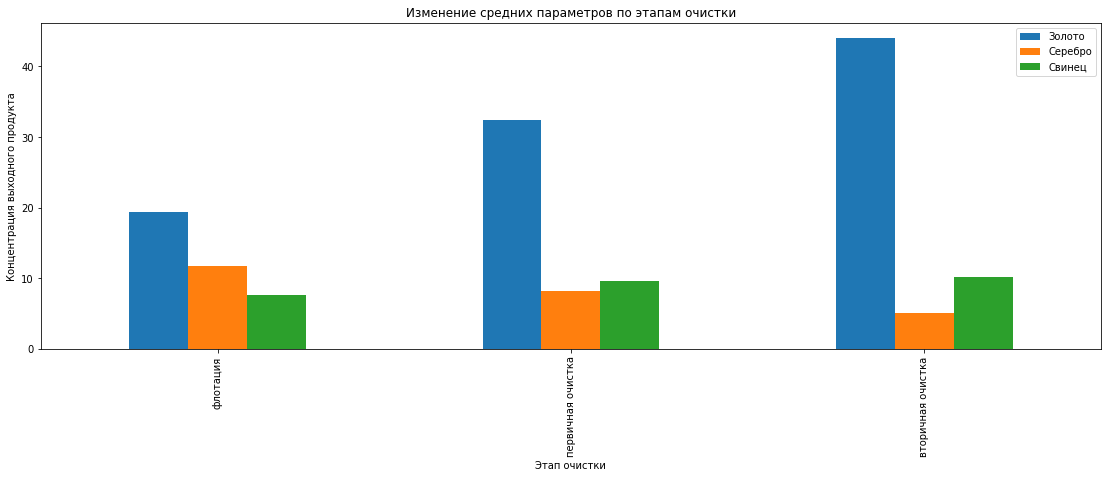

In [7]:
#2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
data_au = [df_train['rougher.output.concentrate_au'].mean(), 
           df_train['primary_cleaner.output.concentrate_au'].mean(), 
           df_train['final.output.concentrate_au'].mean()]

data_ag = [df_train['rougher.output.concentrate_ag'].mean(), 
           df_train['primary_cleaner.output.concentrate_ag'].mean(), 
           df_train['final.output.concentrate_ag'].mean()]

data_pb = [df_train['rougher.output.concentrate_pb'].mean(), 
           df_train['primary_cleaner.output.concentrate_pb'].mean(), 
           df_train['final.output.concentrate_pb'].mean()]

plotdata = pd.DataFrame({
    "Золото":data_au,
    "Серебро":data_ag,
    "Свинец":data_pb
    }, 
    index=['флотация', 'первичная очистка', 'вторичная очистка']
)
plotdata.plot(kind="bar", figsize=(19,6))
plt.title('Изменение средних параметров по этапам очистки')
plt.xlabel("Этап очистки")
plt.ylabel("Концентрация выходного продукта")

plt.show()



С каждым этапом очистки концентрация золота растет, в то время, как концентрация серебра и свинца снижается все сильнее

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной

Сырье  - то, что поступает на вход этапа "флотация", т.е. параметр `rougher.input.feed_size`

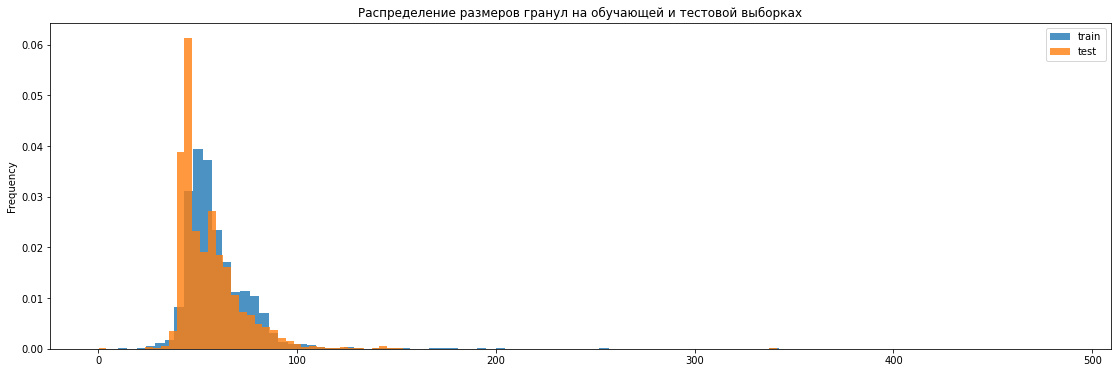

In [8]:
ax = df_train['rougher.input.feed_size'].plot(
    kind='hist', density=True, bins=100, figsize=(19,6), alpha=0.8, label='train', legend=True)
df_test['rougher.input.feed_size'].plot(
    ax=ax, kind='hist', density=True, bins=100, figsize=(19,6), label='test',  alpha=0.8, legend=True)
plt.title("Распределение размеров гранул на обучающей и тестовой выборках")
plt.show()

Видно, что распределение размера гранул сырья для обучающей и тестовой выборки несколько отличается, но в целом несущественно. Но есть выбросы, их удалим.

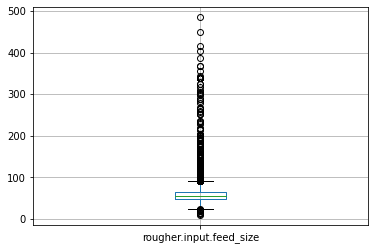

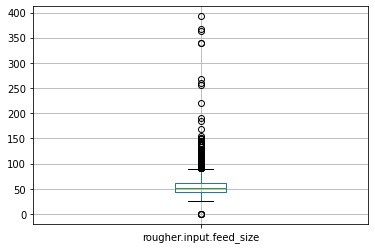

In [9]:
df_train.boxplot(column='rougher.input.feed_size')
plt.show()
df_test.boxplot(column='rougher.input.feed_size')
plt.show()

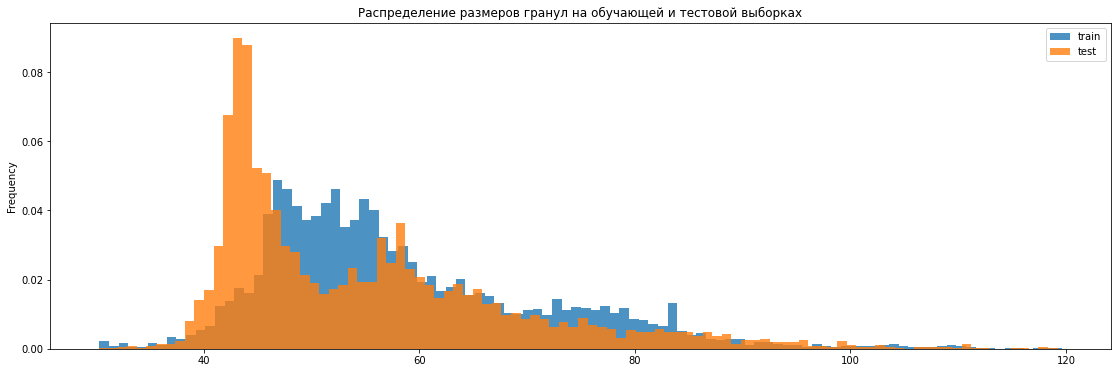

In [10]:
df_train = df_train[(df_train['rougher.input.feed_size'] < 120) & (df_train['rougher.input.feed_size'] > 30) ]
df_test = df_test[(df_test['rougher.input.feed_size'] < 120) & (df_test['rougher.input.feed_size'] > 30)]

ax = df_train['rougher.input.feed_size'].plot(
    kind='hist', bins=100, density=True, figsize=(19,6), alpha=0.8, label='train', legend=True)
df_test['rougher.input.feed_size'].plot(
    ax=ax, kind='hist', bins=100, density=True, figsize=(19,6), label='test',  alpha=0.8, legend=True)
plt.title("Распределение размеров гранул на обучающей и тестовой выборках")
plt.show()

Выбросы теперь не исказят результаты исследования

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

,Золото,Серебро,Свинец,Соли
сырье,7.872634,8.587078,3.509515,36.357965
черновой концентрат,19.433403,11.773031,7.661018,28.287084
финальный концентрат,44.038175,5.133094,10.135302,9.121156


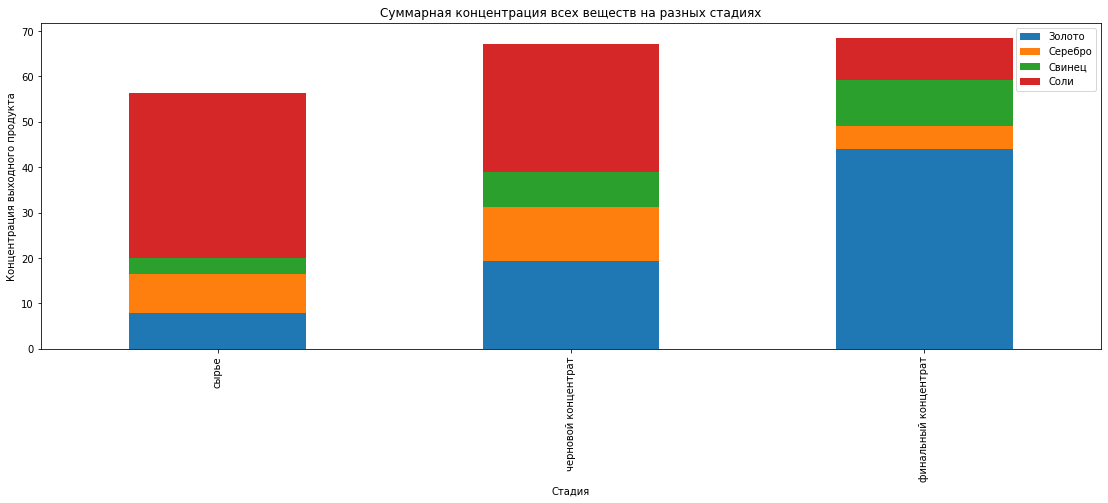

In [11]:
data_au = [df_train['rougher.input.feed_au'].mean(), 
           df_train['rougher.output.concentrate_au'].mean(), 
           df_train['final.output.concentrate_au'].mean()]

data_ag = [df_train['rougher.input.feed_ag'].mean(), 
           df_train['rougher.output.concentrate_ag'].mean(), 
           df_train['final.output.concentrate_ag'].mean()]

data_pb = [df_train['rougher.input.feed_pb'].mean(), 
           df_train['rougher.output.concentrate_pb'].mean(), 
           df_train['final.output.concentrate_pb'].mean()]

data_sol = [df_train['rougher.input.feed_sol'].mean(), 
           df_train['rougher.output.concentrate_sol'].mean(), 
           df_train['final.output.concentrate_sol'].mean()]

plotdata = pd.DataFrame({
    "Золото":data_au,
    "Серебро":data_ag,
    "Свинец":data_pb,
    "Соли":data_sol
    }, 
    index=['сырье', 'черновой концентрат', 'финальный концентрат']
)
display(plotdata)
plotdata.plot(kind="bar", stacked=True, figsize=(19,6))
plt.title('Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel("Стадия")
plt.ylabel("Концентрация выходного продукта")

plt.show()


Видно, что с прохождением каждой из стадий суммарная концентрация металлов постепенно растет с ~20 до ~60 процентов, количество солей уменьшается.

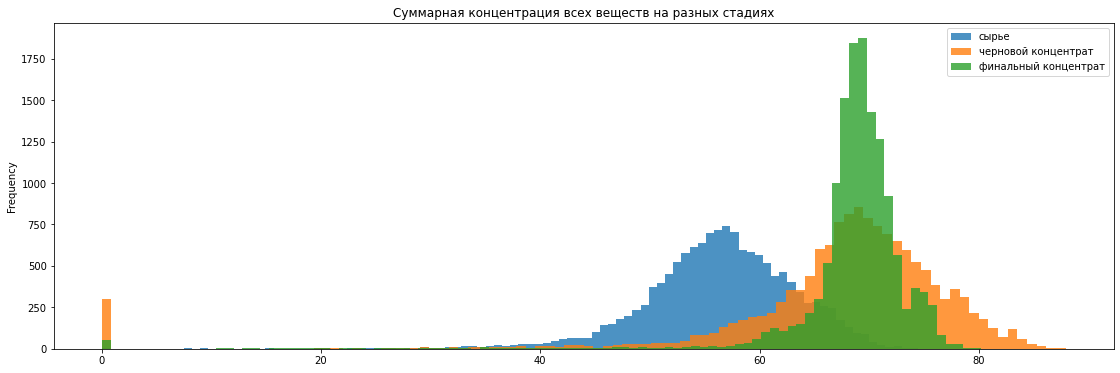

In [12]:
data_1 = (df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] 
            + df_train['rougher.input.feed_pb'] +  df_train['rougher.input.feed_sol'])
    
data_2 = (df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag']
            + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])
    
data_3 = (df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag']
            + df_train['final.output.concentrate_pb'] +  df_train['final.output.concentrate_sol'])

ax = data_1.plot(
    kind='hist', bins=100, figsize=(19,6), alpha=0.8, label='сырье', legend=True)
data_2.plot(
    ax=ax, kind='hist', bins=100, figsize=(19,6), label='черновой концентрат',  alpha=0.8, legend=True)
data_3.plot(
    ax=ax, kind='hist', bins=100, figsize=(19,6), label='финальный концентрат',  alpha=0.8, legend=True)
plt.title("Суммарная концентрация всех веществ на разных стадиях")
plt.show()

Видно, что есть выбросы нулевым значением, которые могут исказить результаты. Избавимся от них и заодно от значений меньше 30

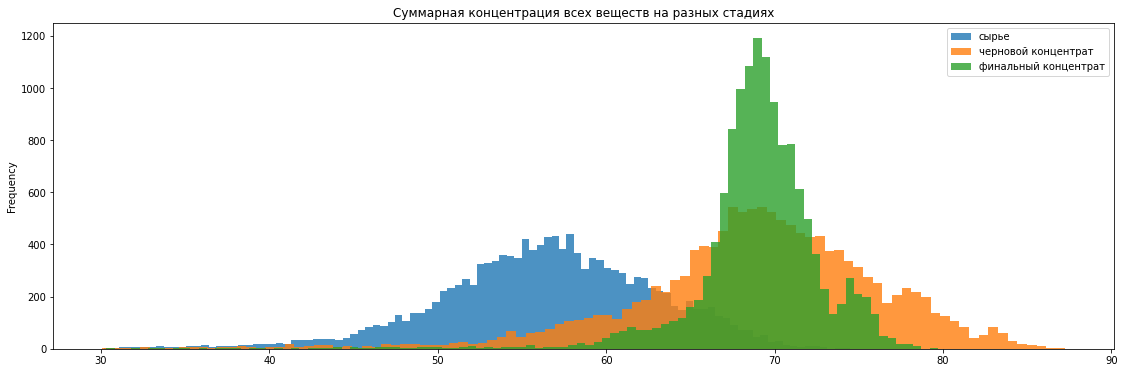

In [13]:
df_train = (df_train.query(
                '(`rougher.input.feed_au` + `rougher.input.feed_ag` + `rougher.input.feed_pb` + `rougher.input.feed_sol` > 30)'
                + '& (`rougher.output.concentrate_au` + `rougher.output.concentrate_ag` + `rougher.output.concentrate_pb` + `rougher.output.concentrate_sol` > 30)'
                + '& (`final.output.concentrate_au` + `final.output.concentrate_ag` + `final.output.concentrate_pb` + `final.output.concentrate_sol` > 30)')
            )

data_1 = (df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] 
            + df_train['rougher.input.feed_pb'] +  df_train['rougher.input.feed_sol'])
    
data_2 = (df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag']
            + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'])
    
data_3 = (df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag']
            + df_train['final.output.concentrate_pb'] +  df_train['final.output.concentrate_sol'])

ax = data_1.plot(
    kind='hist', bins=100, figsize=(19,6), alpha=0.8, label='сырье', legend=True)
data_2.plot(
    ax=ax, kind='hist', bins=100, figsize=(19,6), label='черновой концентрат',  alpha=0.8, legend=True)
data_3.plot(
    ax=ax, kind='hist', bins=100, figsize=(19,6), label='финальный концентрат',  alpha=0.8, legend=True)
plt.title("Суммарная концентрация всех веществ на разных стадиях")
plt.show()

## Модель

Нужно спрогнозировать сразу две величины:
 - эффективность обогащения чернового концентрата `rougher.output.recovery`;
 - эффективность обогащения финального концентрата `final.output.recovery`.

In [14]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [15]:
df_full[['rougher.output.recovery', 'final.output.recovery', 'date']].head()

,rougher.output.recovery,final.output.recovery,date
0,87.107763,70.541216,2016-01-15 00:00:00
1,86.843261,69.266198,2016-01-15 01:00:00
2,86.842308,68.116445,2016-01-15 02:00:00
3,87.226430,68.347543,2016-01-15 03:00:00
4,86.688794,66.927016,2016-01-15 04:00:00


In [16]:
target_train_rougher = df_train['rougher.output.recovery']
target_train_final = df_train['final.output.recovery']
#Удаляем колонки, которых нет в тестовой
features_train = df_train.drop(diff, axis=1)

#Удаляем ненужные признаки
features_train = features_train.drop(['date'], axis=1)

#Подклеим целевой признак из полной выборки в тестовую выборку
df_test = pd.merge(df_test, df_full[['rougher.output.recovery', 'final.output.recovery', 'date']], left_on='date', right_on='date', how='left',)
features_test = df_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_rougher =  df_test['rougher.output.recovery']
target_test_final =  df_test['final.output.recovery']


In [17]:
features_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [30]:
%%time 
K = 5
state = np.random.RandomState(12345)
#Подбор оптимальной модели
def smape(target, predictions):
    return (abs(target - predictions)/((abs(target)+abs(predictions))/2)).mean() * 100 

#Линейная регрессия
model_lr_rougher = LinearRegression()
custom_scorer = make_scorer(smape, greater_is_better=True)
scores = cross_val_score(model_lr_rougher, features_train, target_train_rougher, 
                         scoring=custom_scorer, cv=K)
final_score_lr_rougher = pd.Series(scores).mean()
print('Линейная регрессия. Оценка качества модели для rougher: ', final_score_lr_rougher)

model_lr_final = LinearRegression()
scores = cross_val_score(model_lr_final, features_train, target_train_final, 
                         scoring=custom_scorer, cv=K)
final_score_lr_final = pd.Series(scores).mean()
print('Линейная регрессия. Оценка качества модели для final: ', final_score_lr_final)

Линейная регрессия. Оценка качества модели для rougher:  6.697525532335507
Линейная регрессия. Оценка качества модели для final:  10.414517555807645
CPU times: user 1.16 s, sys: 2.75 s, total: 3.92 s
Wall time: 3.84 s


In [32]:
%%time 
#Дерево решений

#напишем функцию для подбора параметров модели
def model_dt_select(features, target, stage):
    best_model = None
    best_score = 100
    best_depth = 0
    
    for depth in range(1, 6):
        model = DecisionTreeRegressor(random_state = state, max_depth=depth)
        scores = cross_val_score(model, features, target, 
                         scoring=custom_scorer, cv=K)
        score = pd.Series(scores).mean()
        if score < best_score:
            best_score = score
            best_depth = depth
            best_model = model
    print(f'Дерево решений. Оценка качества модели для {stage}: {best_score}')
    print(f'Дерево решений. Глубина дерева решений для {stage}: {best_depth}') 
    return best_model, best_score, best_depth 

#Получим параметры моделей для предсказания эффективности 2 процессов 
model_dt_rougher, model_dt_score_rougher, model_dt_max_depth_rougher = model_dt_select(features_train, target_train_rougher, 'rougher') 
model_dt_final, model_dt_score_final, model_dt_max_depth_final = model_dt_select(features_train, target_train_final, 'final') 

#Пробовал сделать через GridSearchCV, но ничего не получилось
"""
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
model_dt_rougher = GridSearchCV(model_lr_rougher, parameters=None, cv=K,
                    scoring=custom_scorer)
"""

Дерево решений. Оценка качества модели для rougher: 6.432202579725295
Дерево решений. Глубина дерева решений для rougher: 3
Дерево решений. Оценка качества модели для final: 9.108148004319983
Дерево решений. Глубина дерева решений для final: 2
CPU times: user 7.69 s, sys: 0 ns, total: 7.69 s
Wall time: 7.69 s


"\nparameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}\nmodel_dt_rougher = GridSearchCV(model_lr_rougher, parameters=None, cv=K,\n                    scoring=custom_scorer)\n"

In [35]:
%%time 
#Случайный лес
def model_rf_select(features, target, stage):
    best_model = None
    best_score = 100
    best_est = 0
    
    for est in range(1, 11):
        model = RandomForestRegressor(random_state = state, n_estimators=est)
        scores = cross_val_score(model, features, target, 
                         scoring=custom_scorer, cv=K)
        score = pd.Series(scores).mean()
        if score < best_score:
            best_score = score
            best_est = est
            best_model = model
    print(f'Случайный лес. Оценка качества модели для {stage}: {best_score}')
    print(f'Случайный лес. Количество деревьев для {stage}: {best_est}') 
    return best_model, best_score, best_est 

#Получим параметры моделей для предсказания эффективности 2 процессов 
model_rf_rougher, model_rf_score_rougher, model_rf_n_est_rougher = model_rf_select(features_train, target_train_rougher, 'rougher') 
model_rf_final, model_rf_score_final, model_rf_n_est_final = model_rf_select(features_train, target_train_final, 'final') 

Случайный лес. Оценка качества модели для rougher: 6.451848036097087
Случайный лес. Количество деревьев для rougher: 10
Случайный лес. Оценка качества модели для final: 10.044139188157423
Случайный лес. Количество деревьев для final: 8
CPU times: user 3min 58s, sys: 210 ms, total: 3min 58s
Wall time: 3min 58s


Подбор наиболее качественной модели по метрике SMAPE показал , что лучшие результаты дают следюущие модели:
 - для флотации (rougher) дерево решений с гиперпараметром depth = 3(smape = 6,43%)
 - для финальной очистки (final) дерево решений с гиперпараметром depth = 2 (smape = 9,1%)

In [36]:
#Итоговое предсказание на тестовой выборке, используя лучшие модели

model_dt_rougher.fit(features_train, target_train_rougher)
predictions_test_rougher = model_dt_rougher.predict(features_test)

model_dt_final.fit(features_train, target_train_final)
predictions_test_final = model_dt_final.predict(features_test)
total_smape = 0.25 * smape(target_test_rougher, predictions_test_rougher) + 0.75 * smape(target_test_final, predictions_test_final)
print(f'Конечное значение метрики SMAPE на тестовой выборке: {total_smape}')

Конечное значение метрики SMAPE на тестовой выборке: 9.383390706816956


In [39]:
#Сравниваем с  константной моделью
model_dummy = DummyRegressor()
model_dummy.fit(features_train, target_train_rougher)
predictions_test_rougher = model_dummy.predict(features_test)

model_dummy.fit(features_train, target_train_final)
predictions_test_final = model_dummy.predict(features_test)
total_smape = 0.25 * smape(target_test_rougher, predictions_test_rougher) + 0.75 * smape(target_test_final, predictions_test_final)
print(f'Значение метрики SMAPE на тестовой выборке для константной модели: {total_smape}')

Значени метрики SMAPE на тестовой выборке для константной модели: 9.48767893341456


Прииспользовании константной модели видно, что суммарная метрика ошибки smape выше, чем у подобранной нами модели. Следовательно, наша модель проходит проверку на адекватность.

## Вывод
По собранным параметрам технологического процесса создана модель для предсказания коэффициента восстановления золота из золотосодержащей руды для этапа флотации и этапа финальной очистки, проведено предсказание на тестовой выборке.

Лучшей моделью оказалась:
 - для флотации (rougher) дерево решений с гиперпараметром depth = 3(smape = 6,43%)
 - для финальной очистки (final) дерево решений с гиперпараметром depth = 2 (smape = 9,1%)

Качество посчитано с помощью метрики SMAPE(Symmetric mean absolute percentage error). Итоговое значения данной метрики на тестовой выборке для всего технологического процесса составило 9,38% 
Значение метрики SMAPE на тестовой выборке для константной модели -  9.48% , что выше, чем у подобранной нами модели. Следовательно, наша модель проходит проверку на адекватность. 

